### 1. Ï£ºÏöîÎ∞∞Í∏âÏÇ¨ Ï∂îÏ∂ú

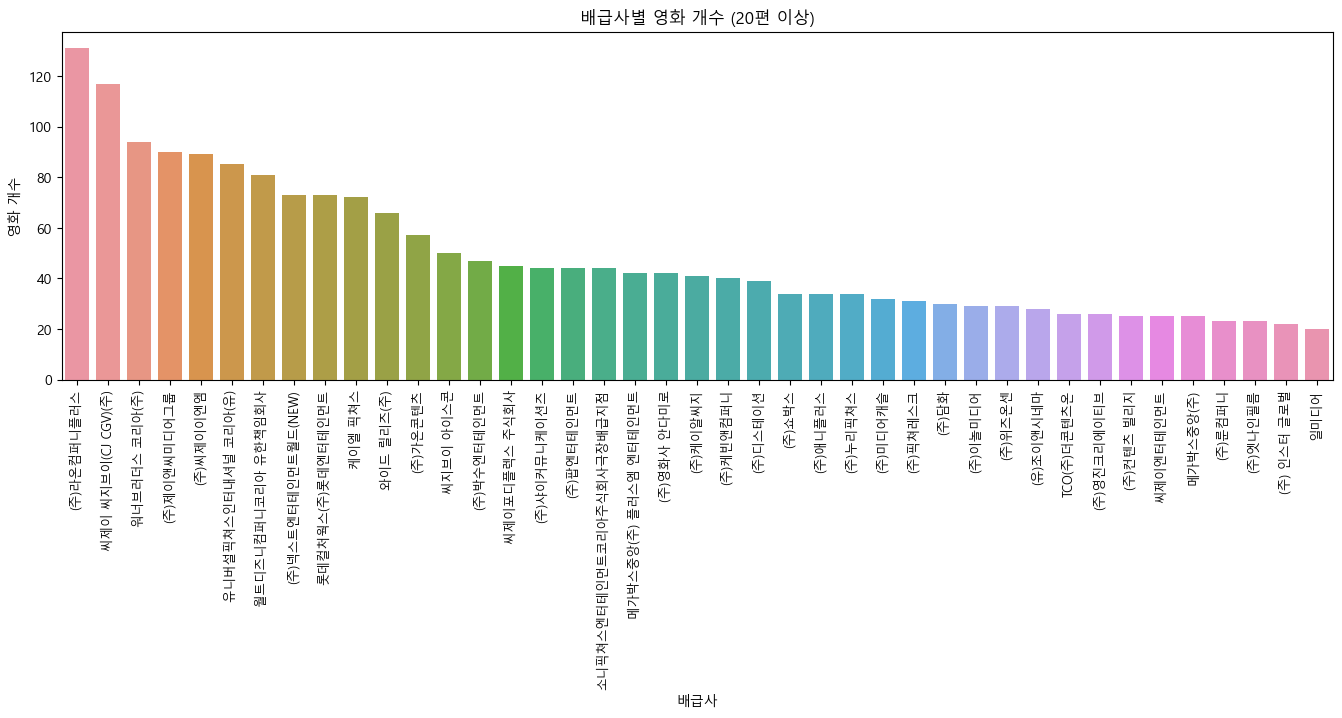

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import matplotlib.font_manager as fm

# 1. ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (Windows Í∏∞Ï§Ä)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 2. CSV Î∂àÎü¨Ïò§Í∏∞
file_path = "data.csv"  # Í≤ΩÎ°ú ÏàòÏ†ï
df = pd.read_csv(file_path)

# 3. Î∞∞Í∏âÏÇ¨ NaNÏùÑ 'Í∏∞ÌÉÄ'Î°ú ÎåÄÏ≤¥
df["Î∞∞Í∏âÏÇ¨(NullÏ≤òÎ¶¨)"] = df["Î∞∞Í∏âÏÇ¨"].fillna("Í∏∞ÌÉÄ")

# 4. ÏΩ§ÎßàÎ°ú Íµ¨Î∂ÑÎêú Î∞∞Í∏âÏÇ¨ Î∂ÑÎ¶¨ Î∞è Î¶¨Ïä§Ìä∏ ÌôïÏû•
distributor_list = []
for entry in df["Î∞∞Í∏âÏÇ¨(NullÏ≤òÎ¶¨)"]:
    distributor_list.extend([name.strip() for name in entry.split(",")])

# 5. Ïπ¥Ïö¥Ìä∏ Î∞è ÏãúÎ¶¨Ï¶àÎ°ú Î≥ÄÌôò
distributor_counts = Counter(distributor_list)
distributor_series = pd.Series(distributor_counts)

# 6. 'Í∏∞ÌÉÄ' Ï†úÏô∏ + ÏòÅÌôî ÏàòÍ∞Ä 20Ìé∏ Ïù¥ÏÉÅÏù∏ Î∞∞Í∏âÏÇ¨Îßå ÌïÑÌÑ∞ÎßÅ
filtered_series = distributor_series[
    (distributor_series >= 20) & (distributor_series.index != "Í∏∞ÌÉÄ")
].sort_values(ascending=False)

# 7. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(max(14, len(filtered_series) * 0.4), 6))
sns.barplot(x=filtered_series.index, y=filtered_series.values)
plt.title("Î∞∞Í∏âÏÇ¨Î≥Ñ ÏòÅÌôî Í∞úÏàò (20Ìé∏ Ïù¥ÏÉÅ)")
plt.xlabel("Î∞∞Í∏âÏÇ¨")
plt.ylabel("ÏòÅÌôî Í∞úÏàò")
plt.xticks(rotation=90, fontsize=9)
plt.subplots_adjust(bottom=0.3)
plt.show()

In [9]:
# Ï£ºÏöî Î∞∞Í∏âÏÇ¨: ÏòÅÌôî 20Ìé∏ Ïù¥ÏÉÅ + 'Í∏∞ÌÉÄ' Ï†úÏô∏
major_distributors = distributor_series[
    (distributor_series >= 20) & (distributor_series.index != "Í∏∞ÌÉÄ")
]

# Ï£ºÏöî Î∞∞Í∏âÏÇ¨ Ïàò Ï∂úÎ†•
print(f"Ï£ºÏöî Î∞∞Í∏âÏÇ¨ Ïàò: {len(major_distributors)}Í∞ú")


Ï£ºÏöî Î∞∞Í∏âÏÇ¨ Ïàò: 41Í∞ú


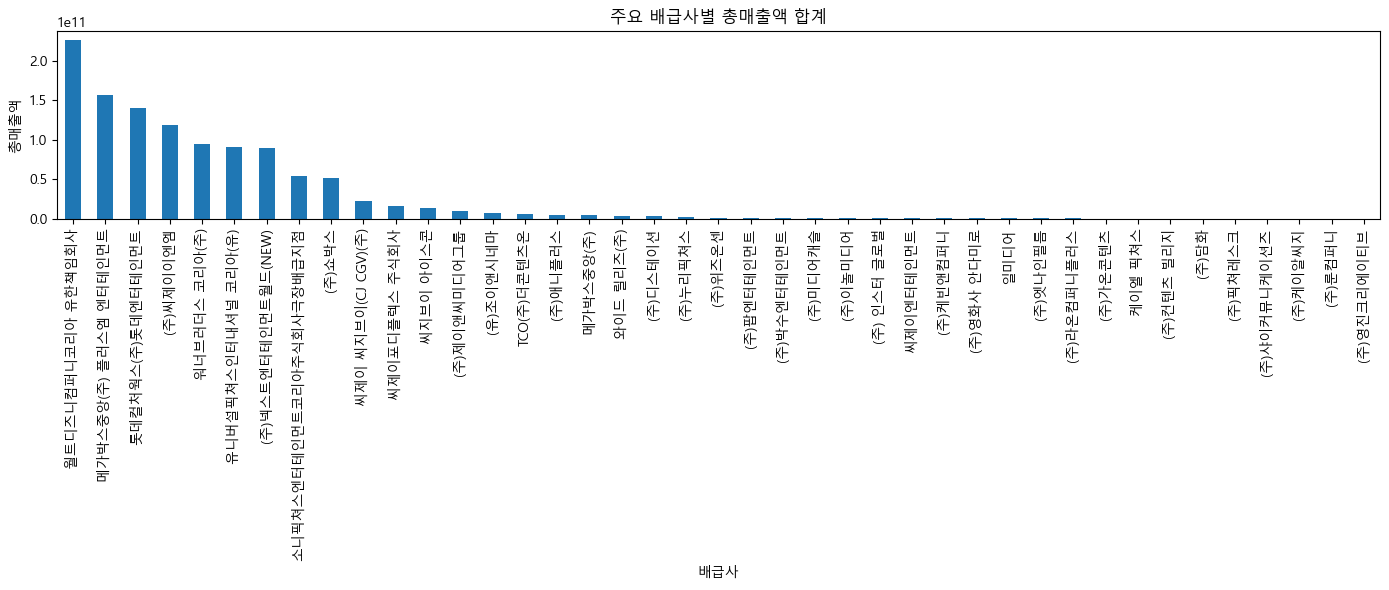

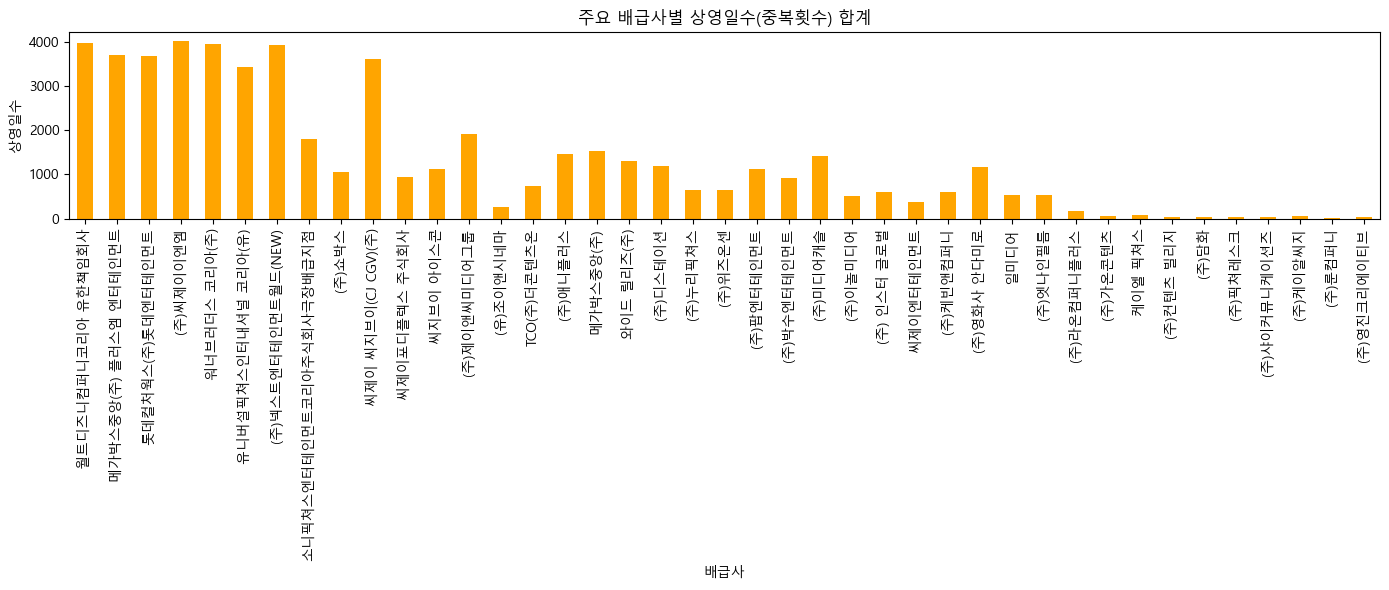

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (Windows)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv("data.csv")
df["Î∞∞Í∏âÏÇ¨(NullÏ≤òÎ¶¨)"] = df["Î∞∞Í∏âÏÇ¨"].fillna("Í∏∞ÌÉÄ")

# Î∞∞Í∏âÏÇ¨ Î∂ÑÎ¶¨ ÌõÑ Ï£ºÏöî Î∞∞Í∏âÏÇ¨ ÏãùÎ≥Ñ
distributor_list = []
for entry in df["Î∞∞Í∏âÏÇ¨(NullÏ≤òÎ¶¨)"]:
    distributor_list.extend([x.strip() for x in entry.split(",")])
distributor_counts = Counter(distributor_list)
distributor_series = pd.Series(distributor_counts)
major_distributors = distributor_series[
    (distributor_series >= 20) & (distributor_series.index != "Í∏∞ÌÉÄ")
].index.tolist()

# Ï£ºÏöî Î∞∞Í∏âÏÇ¨ Í¥ÄÎ†® Ìñâ ÌïÑÌÑ∞ÎßÅ
def extract_major_distributors(entry):
    if pd.isna(entry):
        return []
    return [x.strip() for x in entry.split(",") if x.strip() in major_distributors]

# ÏòÅÌôîÎ≥ÑÎ°ú Ï£ºÏöî Î∞∞Í∏âÏÇ¨ Î¶¨Ïä§Ìä∏ Ï∂îÏ∂ú
df["Ï£ºÏöî_Î∞∞Í∏âÏÇ¨Î™©Î°ù"] = df["Î∞∞Í∏âÏÇ¨"].apply(extract_major_distributors)

# Í∞Å Ï£ºÏöî Î∞∞Í∏âÏÇ¨Î≥Ñ Ï¥ùÎß§Ï∂úÏï° Î∞è Ï§ëÎ≥µÌöüÏàò ÏßëÍ≥Ñ
rows = []
for _, row in df.iterrows():
    for distributor in row["Ï£ºÏöî_Î∞∞Í∏âÏÇ¨Î™©Î°ù"]:
        rows.append({
            "Î∞∞Í∏âÏÇ¨": distributor,
            "Ï¥ùÎß§Ï∂úÏï°": row["Ï¥ùÎß§Ï∂úÏï°"],
            "ÏÉÅÏòÅÏùºÏàò": row["ÏÉÅÏòÅÏùºÏàò"]
        })

df_major = pd.DataFrame(rows)

# Ï¥ùÎß§Ï∂úÏï°, Ï§ëÎ≥µÌöüÏàò ÏßëÍ≥Ñ
agg_df = df_major.groupby("Î∞∞Í∏âÏÇ¨")[["Ï¥ùÎß§Ï∂úÏï°", "ÏÉÅÏòÅÏùºÏàò"]].sum().sort_values("Ï¥ùÎß§Ï∂úÏï°", ascending=False)

# 1. Ï¥ùÎß§Ï∂úÏï° Í∑∏ÎûòÌîÑ
plt.figure(figsize=(14, 6))
agg_df["Ï¥ùÎß§Ï∂úÏï°"].plot(kind="bar")
plt.title("Ï£ºÏöî Î∞∞Í∏âÏÇ¨Î≥Ñ Ï¥ùÎß§Ï∂úÏï° Ìï©Í≥Ñ")
plt.ylabel("Ï¥ùÎß§Ï∂úÏï°")
plt.xlabel("Î∞∞Í∏âÏÇ¨")
plt.tight_layout()
plt.show()

# 2. Ï§ëÎ≥µÌöüÏàò Í∑∏ÎûòÌîÑ
plt.figure(figsize=(14, 6))
agg_df["ÏÉÅÏòÅÏùºÏàò"].plot(kind="bar", color="orange")
plt.title("Ï£ºÏöî Î∞∞Í∏âÏÇ¨Î≥Ñ ÏÉÅÏòÅÏùºÏàò(Ï§ëÎ≥µÌöüÏàò) Ìï©Í≥Ñ")
plt.ylabel("ÏÉÅÏòÅÏùºÏàò")
plt.xlabel("Î∞∞Í∏âÏÇ¨")
plt.tight_layout()
plt.show()


## Í¥ÄÍ∞ù Ïàò Í∏âÍ∞êÏùº ÏãúÍ∞ÅÌôî

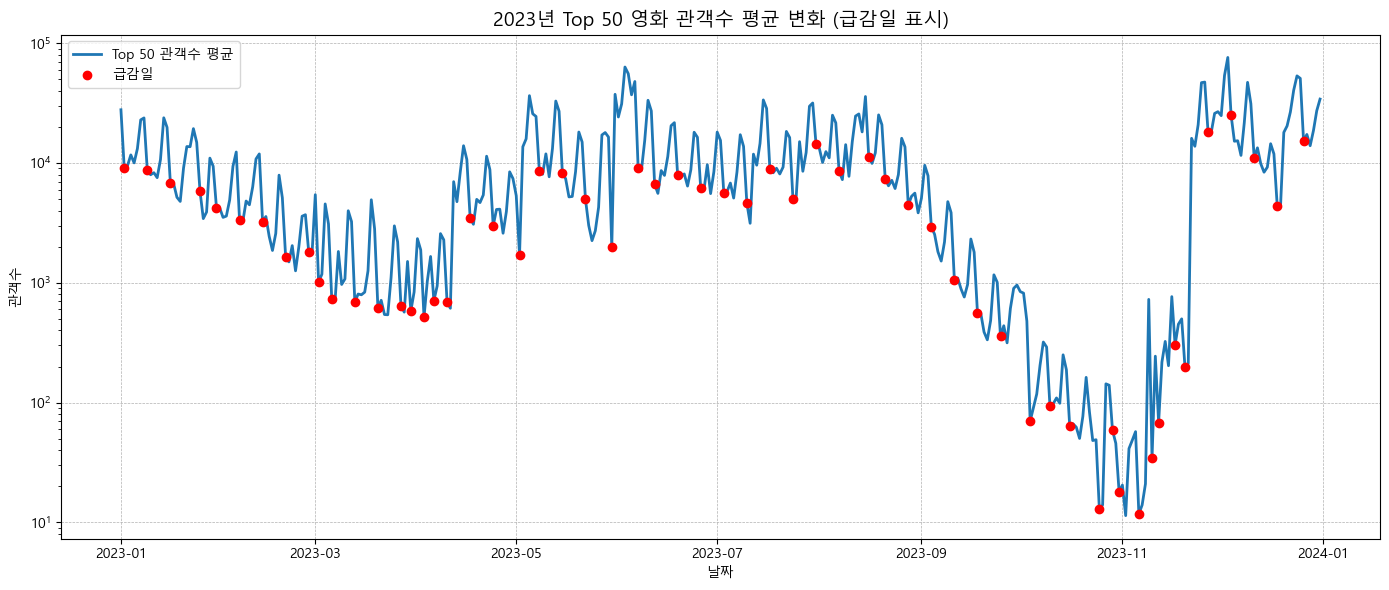

üìâ Í¥ÄÍ∞ùÏàò Í∏âÍ∞ê ÎÇ†Ïßú ÏöîÏïΩ:
           ÎÇ†Ïßú       Í¥ÄÍ∞ùÏàò ÌèâÍ∑†Í∞í         ÏöîÏùº   Ïõî
0  2023-01-02   9094.333333     Monday   1
1  2023-01-09   8691.800000     Monday   1
2  2023-01-16   6839.800000     Monday   1
3  2023-01-25   5816.200000  Wednesday   1
4  2023-01-30   4223.400000     Monday   1
5  2023-02-06   3355.666667     Monday   2
6  2023-02-13   3227.800000     Monday   2
7  2023-02-20   1636.714286     Monday   2
8  2023-02-27   1811.400000     Monday   2
9  2023-03-02   1012.333333   Thursday   3
10 2023-03-06    726.428571     Monday   3
11 2023-03-13    690.500000     Monday   3
12 2023-03-20    620.400000     Monday   3
13 2023-03-27    646.000000     Monday   3
14 2023-03-30    581.000000   Thursday   3
15 2023-04-03    516.250000     Monday   4
16 2023-04-06    708.250000   Thursday   4
17 2023-04-10    689.750000     Monday   4
18 2023-04-17   3485.000000     Monday   4
19 2023-04-24   2981.750000     Monday   4
20 2023-05-02   1703.200000    Tuesday

In [8]:
# Í∏∞Ï§Ä 1: Ï†ÑÏùºÎåÄÎπÑ Í¥ÄÍ∞ùÏàòÍ∞Ä 50% ÌïòÎùΩ


import pandas as pd
import matplotlib.pyplot as plt
import ast

# üî∏ ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (Windows: ÎßëÏùÄ Í≥†Îîï)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # ÏùåÏàò Í∏∞Ìò∏ Íπ®Ïßê Î∞©ÏßÄ

# üî∏ CSV Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv("data.csv")
df['Ï¥ùÎß§Ï∂úÏï°'] = pd.to_numeric(df['Ï¥ùÎß§Ï∂úÏï°'], errors='coerce')

# üî∏ ÏÉÅÏúÑ 50Í∞ú, ÏÉÅÏúÑ 30% Ï∂îÏ∂ú
top_50 = df.nlargest(50, 'Ï¥ùÎß§Ï∂úÏï°')
top_30_percent_count = int(len(df) * 0.3)
top_30_percent = df.nlargest(top_30_percent_count, 'Ï¥ùÎß§Ï∂úÏï°')

# üî∏ ÎÇ†ÏßúÎ≥Ñ ÌèâÍ∑†ÏúºÎ°ú Ï†ïÎ¶¨ÌïòÎäî Ìï®Ïàò
def aggregate_datewise(df_subset, col_name):
    data = []
    for _, row in df_subset.iterrows():
        try:
            dates = ast.literal_eval(row['ÎÇ†Ïßú']) if isinstance(row['ÎÇ†Ïßú'], str) else []
            values = ast.literal_eval(row[col_name]) if isinstance(row[col_name], str) else []
            for date, val in zip(dates, values):
                data.append((date, val))
        except:
            continue
    result_df = pd.DataFrame(data, columns=['ÎÇ†Ïßú', col_name])
    result_df['ÎÇ†Ïßú'] = pd.to_datetime(result_df['ÎÇ†Ïßú'], errors='coerce')
    return result_df.groupby('ÎÇ†Ïßú')[col_name].mean().sort_index()

# üî∏ Î≥ÄÌôîÎüâ Í∏âÍ∞ê ÏãúÏ†ê ÌÉêÏßÄ Ìï®Ïàò
def find_drop_dates(series, threshold=-0.5):
    pct_change = series.pct_change()
    drop_dates = pct_change[pct_change < threshold].index
    return drop_dates

# üî∏ Í∏âÍ∞ê ÎÇ†Ïßú Ï†ïÎ≥¥ Ï∂úÎ†• Ìï®Ïàò
def annotate_drop_dates(series, drop_dates):
    drop_info = []
    for date in drop_dates:
        val = series.loc[date]
        drop_info.append({
            'ÎÇ†Ïßú': date,
            'Í¥ÄÍ∞ùÏàò ÌèâÍ∑†Í∞í': val,
            'ÏöîÏùº': date.strftime('%A'),
            'Ïõî': date.month
        })
    return pd.DataFrame(drop_info)

# üî∏ Î∂ÑÏÑùÌï† ÎÇ†Ïßú Î≤îÏúÑ ÏÑ§Ï†ï (2023ÎÖÑ 1ÎÖÑÏπò)
start_date = pd.to_datetime("2023-01-01")
end_date = pd.to_datetime("2023-12-31")

# üî∏ Í¥ÄÍ∞ùÏàò Í∏∞Ï§Ä ÎÇ†ÏßúÎ≥Ñ ÌèâÍ∑†
top_viewers = aggregate_datewise(top_50, 'Í¥ÄÍ∞ùÏàò')
top_viewers = top_viewers[(top_viewers.index >= start_date) & (top_viewers.index <= end_date)]

# üî∏ Í∏âÍ∞êÏùº ÌÉêÏßÄ Î∞è Ï†ïÎ≥¥ ÏöîÏïΩ
drop_dates = find_drop_dates(top_viewers, threshold=-0.5)
drop_info_df = annotate_drop_dates(top_viewers, drop_dates)

# üî∏ ÏãúÍ∞ÅÌôî (Í∏âÍ∞ê ÌëúÏãú Ìè¨Ìï®)
plt.figure(figsize=(14, 6))
plt.plot(top_viewers.index, top_viewers.values, label='Top 50 Í¥ÄÍ∞ùÏàò ÌèâÍ∑†', linewidth=2)
plt.scatter(drop_dates, top_viewers.loc[drop_dates], color='red', label='Í∏âÍ∞êÏùº', zorder=5)
plt.title('2023ÎÖÑ Top 50 ÏòÅÌôî Í¥ÄÍ∞ùÏàò ÌèâÍ∑† Î≥ÄÌôî (Í∏âÍ∞êÏùº ÌëúÏãú)', fontsize=14)
plt.xlabel('ÎÇ†Ïßú')
plt.ylabel('Í¥ÄÍ∞ùÏàò')
plt.yscale('log')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# üî∏ Í∏âÍ∞êÏùº Ìëú Ï∂úÎ†•
print("üìâ Í¥ÄÍ∞ùÏàò Í∏âÍ∞ê ÎÇ†Ïßú ÏöîÏïΩ:")
print(drop_info_df)


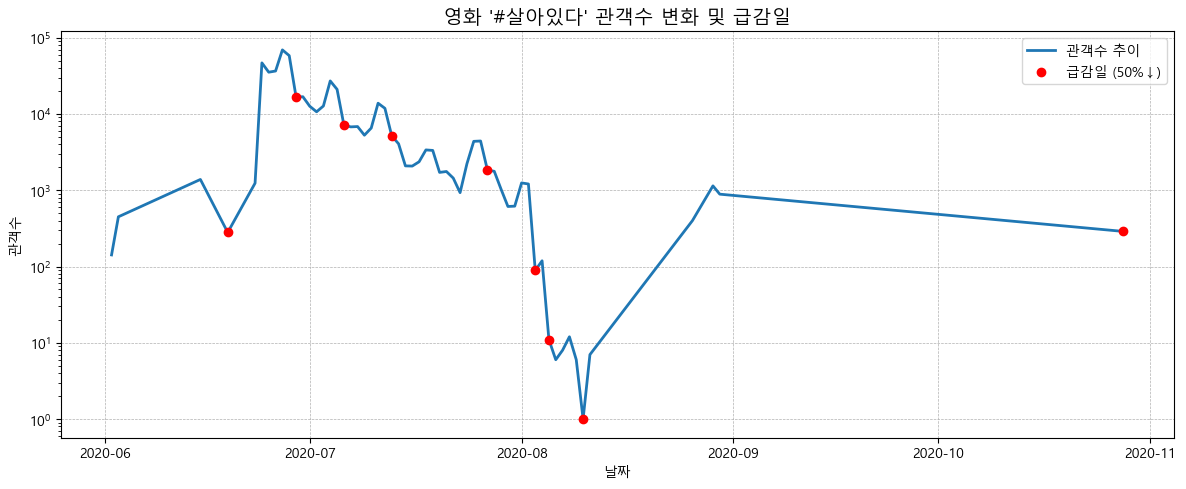

üé¨ '#ÏÇ¥ÏïÑÏûàÎã§' Í∏âÍ∞êÏùº ÏöîÏïΩ:
          ÎÇ†Ïßú    Í¥ÄÍ∞ùÏàò       Í∞êÏÜåÏú®  ÏÉÅÏòÅ ÏãúÏûëÏúºÎ°úÎ∂ÄÌÑ∞ Í≤ΩÍ≥ºÏùº         ÏöîÏùº   Ïõî
0 2020-06-19    280 -0.797980             17     Friday   6
1 2020-06-29  16743 -0.712571             27     Monday   6
2 2020-07-06   7164 -0.659587             34     Monday   7
3 2020-07-13   5163 -0.565111             41     Monday   7
4 2020-07-27   1845 -0.583145             55     Monday   7
5 2020-08-03     89 -0.926385             62     Monday   8
6 2020-08-05     11 -0.907563             64  Wednesday   8
7 2020-08-10      1 -0.833333             69     Monday   8
8 2020-10-28    289 -0.674916            148  Wednesday  10


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

# üî∏ ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (Windows: ÎßëÏùÄ Í≥†Îîï)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# üî∏ Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv("data.csv")

# üî∏ '#ÏÇ¥ÏïÑÏûàÎã§' ÏòÅÌôîÎßå ÌïÑÌÑ∞ÎßÅ
movie_title = "#ÏÇ¥ÏïÑÏûàÎã§"
movie_row = df[df['ÏòÅÌôîÎ™Ö'] == movie_title]

if movie_row.empty:
    raise ValueError(f"ÏòÅÌôî '{movie_title}'Î•º Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# üî∏ ÎÇ†Ïßú Î∞è Í¥ÄÍ∞ùÏàò Ï∂îÏ∂ú
dates = ast.literal_eval(movie_row.iloc[0]['ÎÇ†Ïßú']) if isinstance(movie_row.iloc[0]['ÎÇ†Ïßú'], str) else []
viewers = ast.literal_eval(movie_row.iloc[0]['Í¥ÄÍ∞ùÏàò']) if isinstance(movie_row.iloc[0]['Í¥ÄÍ∞ùÏàò'], str) else []

# üî∏ ÏãúÍ≥ÑÏó¥Î°ú Î≥ÄÌôò
series = pd.Series(viewers, index=pd.to_datetime(dates))
series = series.sort_index()

# üî∏ ÏÉÅÏòÅ ÏãúÏûëÏùº
start_date = series.index[0]

# üî∏ Í∏âÍ∞êÏùº ÌÉêÏßÄ (50% Ïù¥ÏÉÅ ÌïòÎùΩ)
pct_change = series.pct_change()
drop_dates = pct_change[pct_change < -0.5].index

# üî∏ Í≤∞Í≥º ÌÖåÏù¥Î∏î ÏÉùÏÑ±
drop_info = []
for date in drop_dates:
    drop_info.append({
        'ÎÇ†Ïßú': date,
        'Í¥ÄÍ∞ùÏàò': series[date],
        'Í∞êÏÜåÏú®': pct_change[date],
        'ÏÉÅÏòÅ ÏãúÏûëÏúºÎ°úÎ∂ÄÌÑ∞ Í≤ΩÍ≥ºÏùº': (date - start_date).days,
        'ÏöîÏùº': date.strftime('%A'),
        'Ïõî': date.month
    })

drop_df = pd.DataFrame(drop_info)

# üî∏ Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 5))
plt.plot(series.index, series.values, label='Í¥ÄÍ∞ùÏàò Ï∂îÏù¥', linewidth=2)
plt.scatter(drop_dates, series.loc[drop_dates], color='red', label='Í∏âÍ∞êÏùº (50%‚Üì)', zorder=5)
plt.title(f"ÏòÅÌôî '{movie_title}' Í¥ÄÍ∞ùÏàò Î≥ÄÌôî Î∞è Í∏âÍ∞êÏùº", fontsize=14)
plt.xlabel('ÎÇ†Ïßú')
plt.ylabel('Í¥ÄÍ∞ùÏàò')
plt.yscale('log')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# üî∏ Í≤∞Í≥º Ï∂úÎ†•
print(f"üé¨ '{movie_title}' Í∏âÍ∞êÏùº ÏöîÏïΩ:")
print(drop_df)


## ÌÜµÍ≥ÑÏ†Å ÌäπÏÑ± Ï∂îÏ∂ú

#### 1. Ìù•ÌñâÏßÄÏÜçÎ•† = ÎßàÏßÄÎßâÏ£ºÏ∞® Îß§Ï∂ú ÌèâÍ∑† / Ï≤´Ï£ºÏ∞® Îß§Ï∂ú ÌèâÍ∑†
    (Í∑ºÎç∞ Ïû¨Í∞úÎ¥âÌïú Í≤ÉÏóê ÎåÄÌï¥ÏÑúÎäî Ìù•Ìñâ ÏßÄÏÜçÎ•†ÏùÑ Ïñ¥ÎñªÍ≤å ÌåêÎã®Ìï¥ÏïºÌï† ÏßÄ Î™®Î•¥Í≤†Ïùå)

#### 2. Í¥ÄÍ∞ùÍ∞êÏÜåÏú® = Ï≤òÏùå ÎåÄÎπÑ ÎßàÏßÄÎßâ Í¥ÄÍ∞ù ÏàòÏùò Í∞êÏÜå ÎπÑÏú® (ÏùåÏàòÏù¥Î©¥ Í¥ÄÍ∞ù ÏàòÍ∞Ä Ï¶ùÍ∞ÄÌïú Í≤É)

#### 3. Î∞òÍ∞êÍ∏∞ = ÏµúÏ¥à Í¥ÄÍ∞ù ÏàòÏùò Ï†àÎ∞ò Ïù¥ÌïòÎ°ú Îñ®Ïñ¥ÏßÄÎäî Îç∞ Í±∏Î¶¨Îäî ÏãúÍ∞Ñ
    (ÏòÅÌôîÏùò Ïù∏Í∏∞Í∞Ä Ïû¶ÏïÑÎìúÎäîÍ≤å Í∞úÎ¥â ÌõÑ Î™áÏùºÏù¥ ÏßÄÎÇú ÏãúÏ†êÏù∏ÏßÄÎ•º ÌååÏïÖ Í∞ÄÎä•)

#### 4. Í∏∞Ïö∏Í∏∞ = Í¥ÄÍ∞ùÏàò Î≥ÄÌôî Ï∂îÏÑ∏ (ÏùåÏàòÎ©¥ Í∞êÏÜå)

#### 5. Ïû¨Î∞òÎì±ÌöüÏàò = ÏßÅÏ†ÑÏùº ÎåÄÎπÑ Í¥ÄÍ∞ùÏàòÍ∞Ä 2Î∞∞ Ïù¥ÏÉÅ Îã§Ïãú Ï¶ùÍ∞ÄÌïú ÌöüÏàò

#### 6. ÏùºÏùºÌèâÍ∑†Í¥ÄÍ∞ùÏàò = Ï†ÑÏ≤¥ Í∏∞Í∞Ñ ÎèôÏïàÏùò ÌèâÍ∑† Í¥ÄÍ∞ù Ïàò

In [3]:
import pandas as pd
import numpy as np
import ast
from datetime import datetime
from sklearn.linear_model import LinearRegression
from tabulate import tabulate

# CSV ÌååÏùº Í≤ΩÎ°ú
file_path = "data.csv"
df = pd.read_csv(file_path)

# Î∂ÑÏÑù Ìï®Ïàò Ï†ïÏùò
def analyze_metrics(row):
    try:
        audience = ast.literal_eval(row['Í¥ÄÍ∞ùÏàò'])
        dates = ast.literal_eval(row['ÎÇ†Ïßú'])
        if not audience or not dates or len(audience) != len(dates):
            return pd.Series([np.nan] * 6)

        # 1. Í∞êÏÜåÏú®
        decay_rate = round((audience[0] - audience[-1]) / audience[0], 3)

        # 2. Î∞òÍ∞êÍ∏∞
        half = audience[0] / 2
        half_life = next((i for i, v in enumerate(audience) if v < half), len(audience))

        # 3. Í∏∞Ïö∏Í∏∞
        x = np.arange(len(audience)).reshape(-1, 1)
        y = np.array(audience).reshape(-1, 1)
        model = LinearRegression().fit(x, y)
        slope = round(model.coef_[0][0], 3)

        # 4. Ïû¨Î∞òÎì± ÌöüÏàò
        rebounds = sum(
            audience[i + 1] >= audience[i] * 2.0
            for i in range(len(audience) - 1)
        )
        
        # 5. ÌèâÍ∑† Í¥ÄÍ∞ùÏàò
        avg_per_day = round(sum(audience) / len(audience), 3)

        # 6. Ìù•Ìñâ ÏßÄÏÜçÎ•†
        date_objs = [datetime.strptime(d, '%Y-%m-%d') for d in dates]
        base_date = date_objs[0]
        week_sales = {}
        for d, s in zip(date_objs, audience):
            week = (d - base_date).days // 7 + 1
            week_sales.setdefault(week, []).append(s)
        weekly_avg = [np.mean(week_sales[w]) for w in sorted(week_sales)]
        sustain = round(weekly_avg[-1] / weekly_avg[0], 3) if len(weekly_avg) >= 2 and weekly_avg[0] > 0 else np.nan

        return pd.Series([decay_rate, half_life, slope, rebounds, avg_per_day, sustain])

    except Exception:
        return pd.Series([np.nan] * 6)

# Î∂ÑÏÑù Ïª¨Îüº Ï∂îÍ∞Ä
df[['Í¥ÄÍ∞ùÍ∞êÏÜåÏú®', 'Î∞òÍ∞êÍ∏∞', 'Í∏∞Ïö∏Í∏∞', 'Ïû¨Î∞òÎì±ÌöüÏàò', 'ÏùºÏùºÌèâÍ∑†Í¥ÄÍ∞ùÏàò', 'Ìù•ÌñâÏßÄÏÜçÎ•†']] = df.apply(analyze_metrics, axis=1)

# Í≤∞Í≥º Ï∂úÎ†•
result_df = df[['ÏòÅÌôîÎ™Ö', 'Í¥ÄÍ∞ùÍ∞êÏÜåÏú®', 'Î∞òÍ∞êÍ∏∞', 'Í∏∞Ïö∏Í∏∞', 'Ïû¨Î∞òÎì±ÌöüÏàò', 'ÏùºÏùºÌèâÍ∑†Í¥ÄÍ∞ùÏàò', 'Ìù•ÌñâÏßÄÏÜçÎ•†']]
columns = ['ÏòÅÌôîÎ™Ö', 'Í¥ÄÍ∞ùÍ∞êÏÜåÏú®', 'Î∞òÍ∞êÍ∏∞', 'Í∏∞Ïö∏Í∏∞', 'Ïû¨Î∞òÎì±ÌöüÏàò', 'ÏùºÏùºÌèâÍ∑†Í¥ÄÍ∞ùÏàò', 'Ìù•ÌñâÏßÄÏÜçÎ•†']
print(tabulate(result_df[columns].head(10), headers='keys', tablefmt='pretty', showindex=False))

# ÌïÑÏöî Ïãú Í≤∞Í≥º Ï†ÄÏû•
df.to_csv("filtered_analysis.csv", index=False, encoding='utf-8-sig')


+------------------------------------------------------------------+------------+--------+----------+------------+----------------+------------+
|                              ÏòÅÌôîÎ™Ö                              | Í¥ÄÍ∞ùÍ∞êÏÜåÏú® | Î∞òÍ∞êÍ∏∞ |  Í∏∞Ïö∏Í∏∞  | Ïû¨Î∞òÎì±ÌöüÏàò | ÏùºÏùºÌèâÍ∑†Í¥ÄÍ∞ùÏàò | Ìù•ÌñâÏßÄÏÜçÎ•† |
+------------------------------------------------------------------+------------+--------+----------+------------+----------------+------------+
|                           ÎÑàÏùò Ïù¥Î¶ÑÏùÄ.                           |   -13.0    |  7.0   |  -0.04   |   180.0    |     85.192     |   8.784    |
|                           ÎÇ†Ïî®Ïùò ÏïÑÏù¥                            |   -0.351   |  8.0   |  0.093   |   170.0    |     74.324     |   0.876    |
|                        Îçî ÌçºÏä§Ìä∏ Ïä¨Îû®Îç©ÌÅ¨                        |  -14.417   | 278.0  | -17.234  |   137.0    |    2390.208    |   0.602    |
|                             ÎùºÎùºÎûúÎìú                             |   0.945 

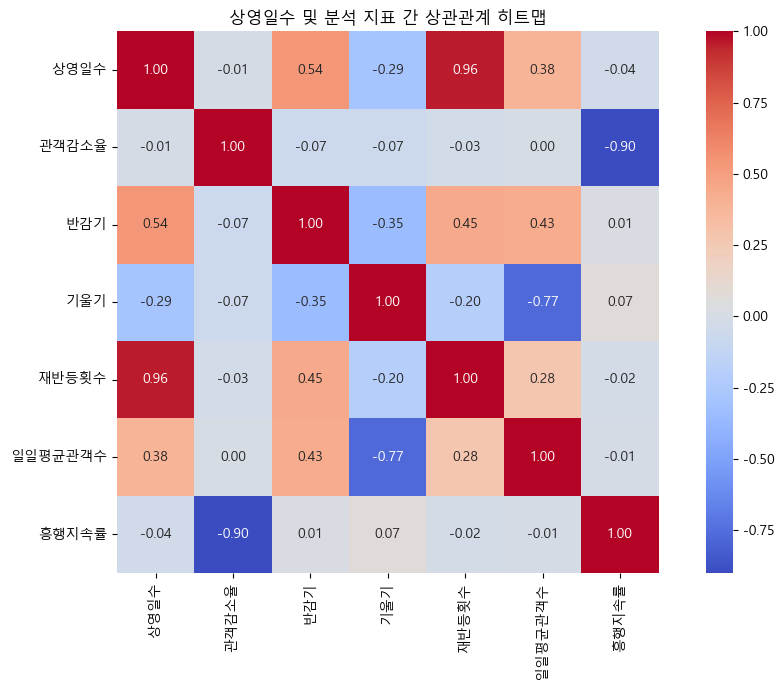

In [4]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'  # ÎòêÎäî 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False  # ÎßàÏù¥ÎÑàÏä§ Íπ®Ïßê Î∞©ÏßÄ

# ÌûàÌä∏Îßµ ÏÉùÏÑ± ÏΩîÎìú
correlation_cols = ['ÏÉÅÏòÅÏùºÏàò', 'Í¥ÄÍ∞ùÍ∞êÏÜåÏú®', 'Î∞òÍ∞êÍ∏∞', 'Í∏∞Ïö∏Í∏∞', 'Ïû¨Î∞òÎì±ÌöüÏàò', 'ÏùºÏùºÌèâÍ∑†Í¥ÄÍ∞ùÏàò', 'Ìù•ÌñâÏßÄÏÜçÎ•†']
correlation_df = df[correlation_cols].copy()
corr_matrix = correlation_df.corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('ÏÉÅÏòÅÏùºÏàò Î∞è Î∂ÑÏÑù ÏßÄÌëú Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌûàÌä∏Îßµ')
plt.tight_layout()
plt.show()

### Ïû¨Î∞òÎì±ÌöüÏàòÎäî ÏÉÅÍ¥ÄÏÑ±Ïù¥ ÎÑò ÎÜíÏïÑÏÑú Ïò§ÌûàÎ†§ Î∂ÄÏ†ÅÌï©ÌïòÎã§Í≥† ÌåêÎã®ÌñàÍ≥†, ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú 'Î∞òÍ∞êÍ∏∞' featureÎßå Ï∂îÍ∞ÄÌï¥ÏÑú ÏÇ¨Ïö©

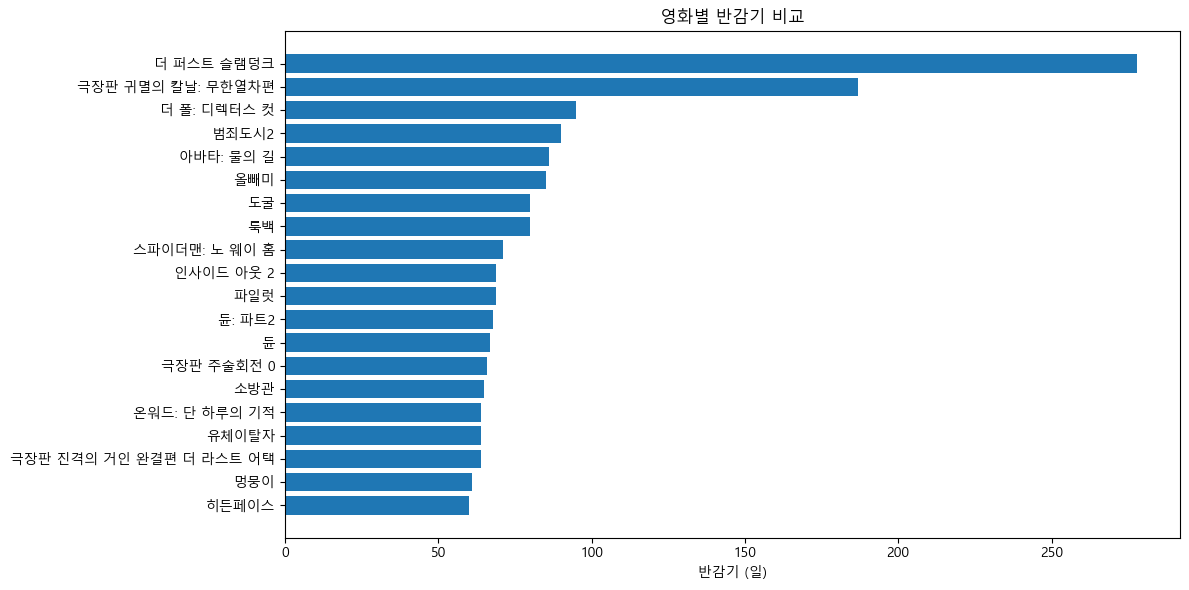

In [5]:
import matplotlib.pyplot as plt

# Î∞òÍ∞êÍ∏∞ Í∏∞Ï§Ä ÏÉÅÏúÑ 20Í∞ú ÏòÅÌôî ÏãúÍ∞ÅÌôî (ÎòêÎäî ÏõêÌïòÏãúÎäî Í∏∞Ï§ÄÏúºÎ°ú Ï†ïÎ†¨/ÌïÑÌÑ∞ Í∞ÄÎä•)
plot_df = df[['ÏòÅÌôîÎ™Ö', 'Î∞òÍ∞êÍ∏∞']].dropna().sort_values(by='Î∞òÍ∞êÍ∏∞', ascending=False).head(20)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
plt.barh(plot_df['ÏòÅÌôîÎ™Ö'], plot_df['Î∞òÍ∞êÍ∏∞'])
plt.xlabel('Î∞òÍ∞êÍ∏∞ (Ïùº)')
plt.title('ÏòÅÌôîÎ≥Ñ Î∞òÍ∞êÍ∏∞ ÎπÑÍµê')
plt.gca().invert_yaxis()  # Î∞òÍ∞êÍ∏∞ ÌÅ∞ ÏòÅÌôîÍ∞Ä ÏúÑÏóê Ïò§ÎèÑÎ°ù
plt.tight_layout()
plt.show()
